Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>

# Data Ingestion & Preprocessing with R

## Table of Contents

- Check for missing values 
- Replace missing values with mode
- Replace missing values with mean
- Split data into Training and Test
- How to detect outliers in data
- How to treat outliers in data

### Check for missing values

In [115]:
# create a dummy dataframe
age = c(12,13,11,14,11,10,NA)
sex = c("M","F","M","F","M","M","F")

data = data.frame(age,sex)
data

age,sex
<dbl>,<fct>
12,M
13,F
11,M
14,F
11,M
10,M
NA,F


In [6]:
is.na(data)

age,sex
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE


In [12]:
colSums(is.na(data))

age sex 
  1   0

So, there is 1 value for the age column with a NA value. 

Another way to do the same thing is with the **sapply ( )** function. 

In [138]:
sapply(data, function(x) {
    sum(is.na(x))
})

age height 
     0      0

The way **sapply ( )** works is that the function (passed as the second argument) will be applied on each of the elements of the data (that has been passed as the first element). To understand this better, let's print the value of x (that is being passed along to the function) and see what is being printed out.

In [140]:
sapply(data, function(x) {
    print (x)
})

[1] 12 13 11 14 11 10 12
[1] 155 162 142 187 125 142 134


age,height
12,155
13,162
11,142
14,187
11,125
10,142
12,134


As you see, each column is passed along as an argument to the function. You can do any operation on it and return the value. In our case, we are calculating how many NAs are there (using the **is.na ( )** function) and returning the count of them using the **sum ( )** function.

### Replace missing values with Mode

One of the strategy to take care of missing values(if you wish them to be note deleted), is to replace all missing values with the mode of the column. Unfortunately, R does not have an in-built **mode** function. So, we might have to write one on our own. 

In [25]:
# all we are doing here is to sort the numeric data in decreasing order and picking up the first element.
mode = function(x){
  names(sort(table(x), decreasing = TRUE))[1]
}

The way this works is

- Tabluate the data
- sort the table in decreasing order
- pick the first element

This should pick up the most occurring element. 

In [31]:
table(data$age)


10 11 12 13 14 
 1  2  1  1  1 

As you can see, 11 is the most occurring element. To get it, sort the table in decreasing order. This brings the biggest element to the beginning.

In [35]:
sort(table(data$age), decreasing = TRUE)


11 10 12 13 14 
 2  1  1  1  1 

Now, we need to get the first element. But, not the first element in the table - the **name** of the first element in the table. You can get that with the **names ( )** function.

In [39]:
names( sort(table(data$age), decreasing = TRUE) )

[1] "11" "10" "12" "13" "14"

Ofcourse, we don't need all the elements, we just need the first element (since it is the most occurring). 

In [40]:
names( sort(table(data$age), decreasing = TRUE) )[1]

[1] "11"

There we go, 11 is the most occurring element in that array.

Once we have the mode, all we have to do is replace it wherever we see a NA. 

In [41]:
data$age[is.na(data$age)] = mode(data$age)

data

age,sex
<chr>,<fct>
12,M
13,F
11,M
14,F
11,M
10,M
11,F


### Replace missing values with Mean

Sometimes, you want to replace missing values with the mean of the column. Use the **mean ( )** function to calculate the mean of the column and use the same method as above. 

In [106]:
# create a dummy dataframe
age = c(12,13,11,14,11,10,NA)
sex = c("M","F","M","F","M","M","F")

data = data.frame(age,sex)
print(data)

  age sex
1  12   M
2  13   F
3  11   M
4  14   F
5  11   M
6  10   M
7  NA   F


In [107]:
mean(data$age)

[1] NA

..oops, that didn't work. That is because, if there are NAs in the data, **mean ( )** returns NA. To go around it, use the flag **na.rm** and set it to **TRUE**.

In [108]:
age_mean = mean(data$age, na.rm = TRUE)
age_mean

[1] 11.83333

In [109]:
data$age[is.na(data$age)] = age_mean
data

age,sex
<dbl>,<fct>
12.00000,M
13.00000,F
11.00000,M
14.00000,F
11.00000,M
10.00000,M
11.83333,F


Why is the age a floating point now ? Because we have introduced mean into that column and the datatype of the column has been upgraded to a float. So, instead of inserting a float, let's just round off the mean using the **round ( )** function. 

In [110]:
age_mean = round(age_mean)
age_mean

[1] 12

In [111]:
# create a dummy dataframe
age = c(12,13,11,14,11,10,NA)
sex = c("M","F","M","F","M","M","F")

data = data.frame(age,sex)
data$age[is.na(data$age)] = round(mean(data$age, na.rm = TRUE))
data

age,sex
<dbl>,<fct>
12,M
13,F
11,M
14,F
11,M
10,M
12,F


In [113]:
data[is.na(data$age)]
data

1
2
3
4
5
6
7

age,sex
<dbl>,<fct>
12,M
13,F
11,M
14,F
11,M
10,M
12,F


### Convert Strings to Factor class

In [44]:
class(data$sex)

[1] "factor"

When we created the dataframe, R was intelligent enough to identify sex ("M", or "F") as a factor and not a string. However, sometimes we might want to do it explicitly. In cases like that, we might have to use the function **as.factor ( )** to convert the data into a factor.

In [46]:
# create a dummy dataframe
age = c(12,13,11,14,11,10,NA)
sex = c("Male","Female","Male","Female","Male","Male","Female")

data = data.frame(age,sex)

class(data$sex)

[1] "factor"

You can verify that the vector sex is not holding factors, while the dataframe is holding sex as a factor.

In [51]:
class(sex)

[1] "character"

In [52]:
class(data$sex)

[1] "factor"

You can also use the **levels ( )** function to identify the different levels in that factor.

In [53]:
levels(data$sex)

[1] "Female" "Male"

You can over-ride this behaviour by specifying **stringAsFactors = FALSE"

In [54]:
# create a dummy dataframe
age = c(12,13,11,14,11,10,NA)
sex = c("Male","Female","Male","Female","Male","Male","Female")

data = data.frame(age,sex, stringsAsFactors = FALSE)

class(data$sex)

[1] "character"

In cases where we want to convert Strings to Factors again, use the **as.factor ( )** function.

In [56]:
data$sex = as.factor(data$sex)
class(data$sex)

[1] "factor"

There we go, we were able to convert strings to Factors. 

### Split data into Train and Test

One of the ways to split data into train and test datasets is to use the **sample ( )** function. Let's see how this works.

In [57]:
data

age,sex
<dbl>,<fct>
12,Male
13,Female
11,Male
14,Female
11,Male
10,Male
NA,Female


The dataframe has 7 rows. Let's use the **nrows ( )** function to find it out.

In [59]:
rows = nrow(data)
print ( rows )

[1] 7


Now, we want to pick a percentage (say 70%) of the rows. To do this, we enumerate all the numbers from 1 to 7 (the row count) and ask the **sample ( )** function to pick 70% of the numbers at random. 

In [62]:
index = sample(1:rows, rows * 0.7)
print ( index)

[1] 6 2 1 3


You can verify that everytime you run this function, it generates random numbers (amounting to 70% of the range 1 - n ). Now, let's pick the 70% of the rows from the dataframe. 

In [65]:
train_data = data[index,] 
test_data = data[-index, ]

In [66]:
train_data

,age,sex
,<dbl>,<fct>
6,10,Male
2,13,Female
1,12,Male
3,11,Male


In [67]:
test_data

,age,sex
,<dbl>,<fct>
4,14,Female
5,11,Male
7,NA,Female


Great. Let's combine all of these steps. 

In [68]:
index = sample ( 1:nrow(data), nrow(data) * 0.7)
train = data[index, ]
test  = data[-index, ]

### How to detect outliers in data

In [188]:
# create a dummy dataframe
age = c(12,13,11,14,11,10,12)
height = c(155,162,142,187,125,142,134)

data = data.frame(age,height)

In [141]:
model = lm(height ~ age , data)

In [142]:
model


Call:
lm(formula = height ~ age, data = data)

Coefficients:
(Intercept)          age  
      2.605       12.395  


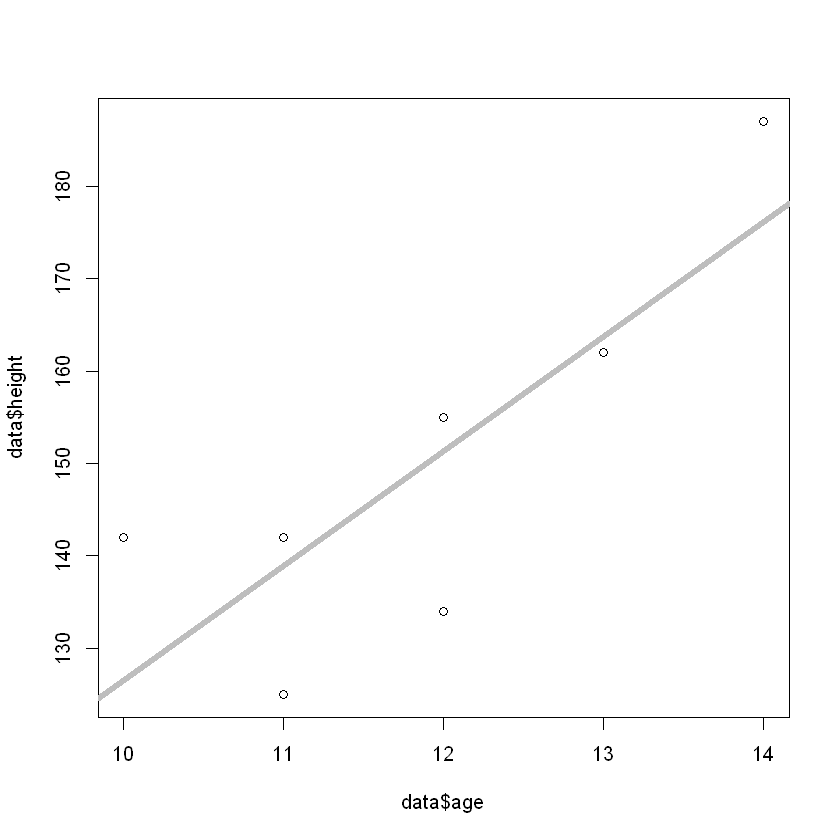

In [162]:
plot(data$age, data$height)
abline(lm(height ~ age, data=data), col="gray", lwd=5, lty=1)

Let's introduce a couple of outliers and plot the graph again. 

In [189]:
age_out    = c(100)
height_out = c(20)

age    = c(age, age_out)
height = c(height, height_out) 

#recreate the dataframe
data = data.frame(age,height)

In [171]:
model = lm(height ~ age , data)
model


Call:
lm(formula = height ~ age, data = data)

Coefficients:
(Intercept)          age  
    166.610       -1.458  


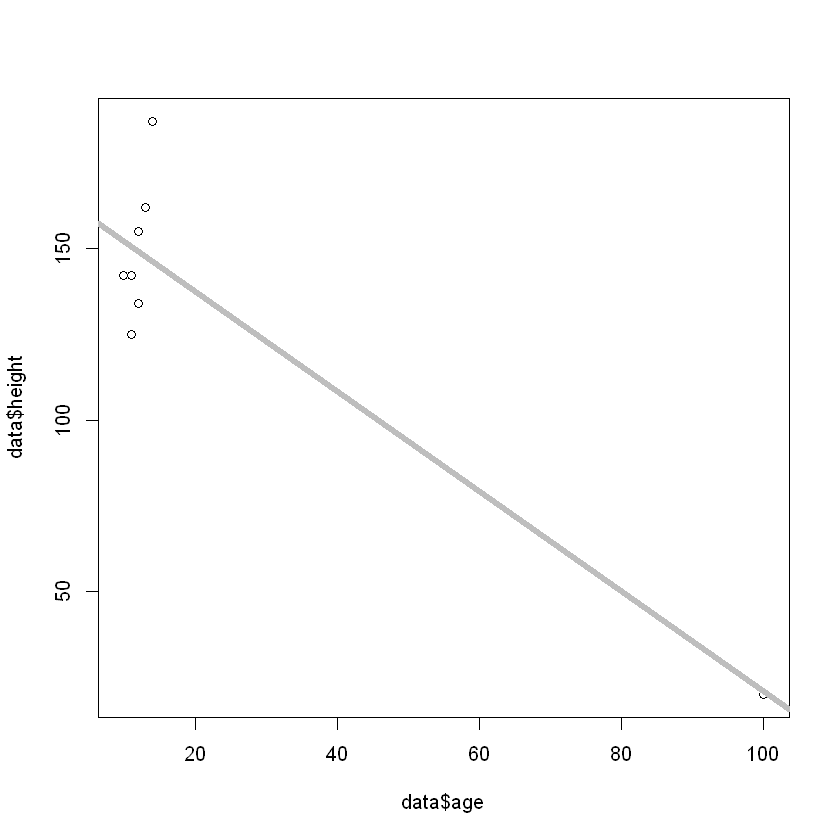

In [172]:
plot(data$age, data$height)
abline(lm(height ~ age, data=data), col="gray", lwd=5, lty=1)

As you can see, the prediction is entirely skewed just because of the introduction of one outlier. Even a small subset can drastically change the model if it has enough weight(value). So, detecting outliers is an important topic that needs to be addressed as part of data cleaning (pre-processing).

One of the time-tested method to detect outliers is the Box and Whisker plot. Anything that lies outside 1.5 * IQR is considered an outlier. **IQR** stands for **I**nter **Q**uartile **R**ange. It is the difference between the 25th and 75th percentile of that variable. Let's do a boxplot with the new data.

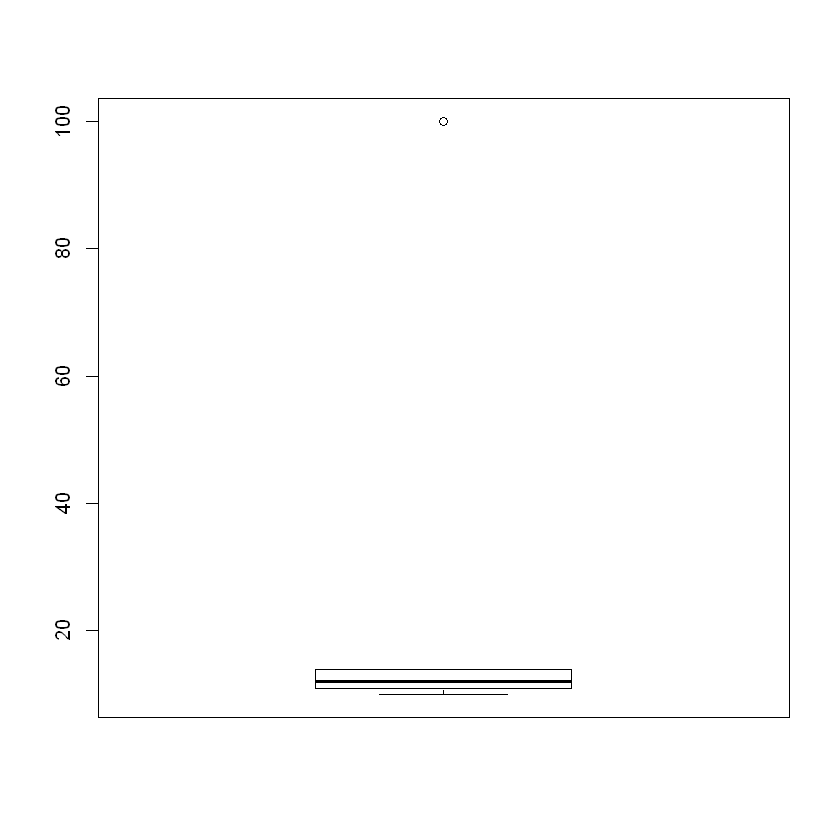

In [175]:
boxplot(data$age)

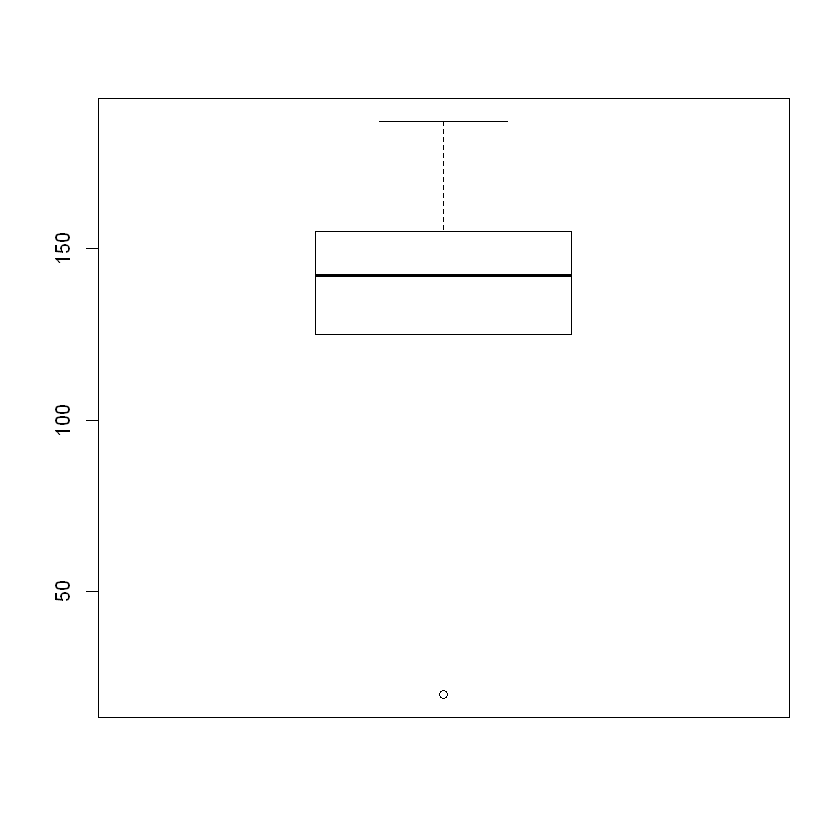

In [176]:
boxplot(data$height)

As you can see, the data is pretty skewed. Let's identify the outliers. 

In [190]:
stats = boxplot.stats(data$height)

In [191]:
stats$out

[1] 20

As you can see, the outlier that we have added to the height column (height of 20) has been detected as the outlier. 

In [192]:
data$height

[1] 155 162 142 187 125 142 134  20

In [193]:
stats = boxplot.stats(data$age)
stats$out

[1] 100

In [194]:
data$age

[1]  12  13  11  14  11  10  12 100

Similarly, the age of 100 that we have added as an outlier to the age column has been detected.

### How to treat outliers in data

Now, how do we work these outliers ? There are a couple of options

- Replace the outliers with imputation (with either mean, median or mode, depending on the nature of data)
- prediction

#### Replace outliers with imputation

#### Prediction